# ***SpamClassifier***

## ***Import the Libraries***

In [0]:
import pandas as pd
import numpy as np

## ***Import the Dataset***

In [10]:
from google.colab import files
uploaded = files.upload()

Saving email.csv to email.csv


In [12]:
spam=pd.read_csv('email.csv')
spam.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [13]:
spam.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
spam.shape

(5728, 2)

## ***Visualization from Tweets***

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## ***Understanding the common words used in the mails: WordCloud***

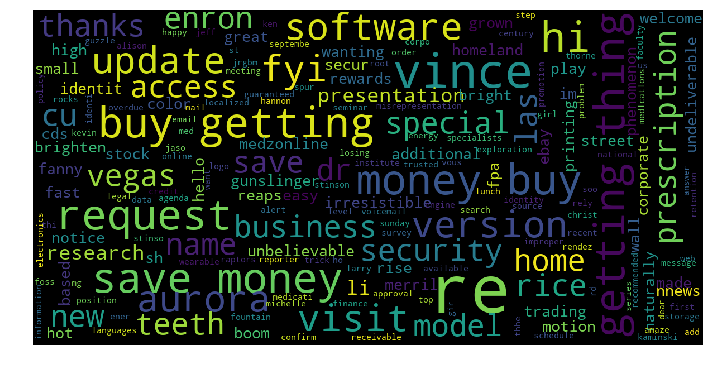

In [25]:
show_wordcloud(spam['text'])

## ***Common Words in non spam mails***

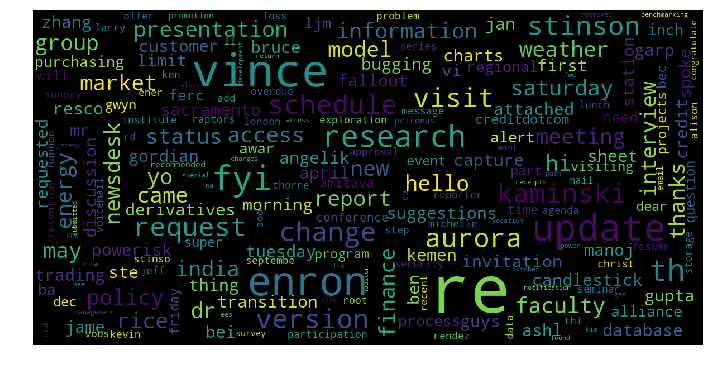

In [23]:
show_wordcloud(spam[spam['spam']==0]['text'])

## ***Common Words in spam mails***

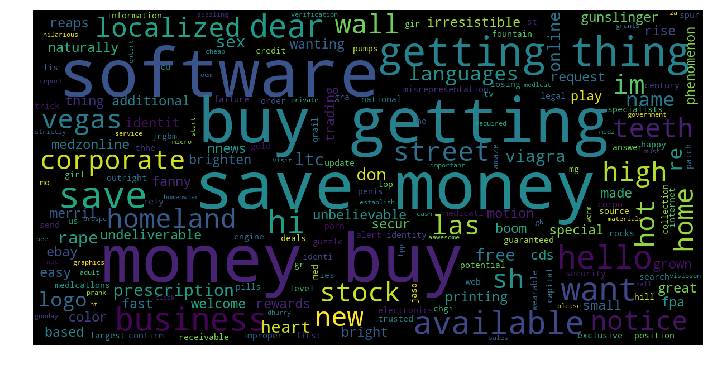

In [24]:
show_wordcloud(spam[spam['spam']==1]['text'])

In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
corpus=[]
for i in range(0,5728):
  review=re.sub('[^a-zA-Z]',' ',spam['text'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)
  

## ***Creating the Bag of Words model***

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [0]:
x=cv.fit_transform(corpus).toarray()

In [19]:
x.shape

(5728, 25589)

In [0]:
y=spam.iloc[:,1]

## ***Train Test Split***

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)

## ***Training model using Naive bayes classifier***

In [0]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()

In [0]:
clf3.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## ***Prediction and Evaluation***

In [0]:
y_pred=clf3.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1075   28]
 [  33  296]]


In [0]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9574022346368715

In [0]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
report=classification_report(y_test,y_pred,target_names=target_names)
print(report)

              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97      1103
     class 1       0.91      0.90      0.91       329

    accuracy                           0.96      1432
   macro avg       0.94      0.94      0.94      1432
weighted avg       0.96      0.96      0.96      1432

